In [328]:
#imports

import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle



In [326]:
#Compute the camera calibration matrix and distortion coefficients given a set of chessboard images
# Load / Display images

images = glob.glob('camera_cal/calibration*.jpg')
outdir = 'output_images/'
print(images)
#object points
objpoints = []
imgpoints = []

# number corners
nx = 9 
ny = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0) taken from course notes
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

#use the code from the lesson

for i,fname in enumerate(images):

    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # print(corners)
    
    # If found
    if ret == True:
        
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw found corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        outfname = outdir + "corners" + str(i) + '.jpg'
        print(outfname)
        cv2.imwrite(outfname,img)


['camera_cal/calibration1.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg']
output_images/corners1.jpg
output_images/corners2.jpg
output_images/corners3.jpg
output_images/corners4.jpg
output_images/corners5.jpg
output_images/corners6.jpg
output_images/corners7.jpg
output_images/corners8.jpg
output_images/corners9.jpg
output_images/corners10.jpg
output_images/corners11.jpg
output_images/corners12.jpg
output_images/corners13.jpg
output_images

In [329]:
#calibrate camera and test undistortion

img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
#undistort
dst = cv2.undistort(img, mtx, dist, None, mtx)

cv2.imwrite(outdir + 'undistorted1.jpg',dst)

#Save the camera calibration parameters

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration.p", "wb" ) )

In [330]:
#undistort the test images

#load saved camera calibration

with open('camera_calibration.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

images = glob.glob('test_images/*.jpg')

outdir = 'output_images/undistorted_test/'
# Visualize undistortion on test images

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    filename = outdir + os.path.split(fname)[1] 
    cv2.imwrite(filename,dst)
    print(filename)


output_images/undistorted_test/straight_lines1.jpg
output_images/undistorted_test/straight_lines2.jpg
output_images/undistorted_test/test1.jpg
output_images/undistorted_test/test2.jpg
output_images/undistorted_test/test3.jpg
output_images/undistorted_test/test4.jpg
output_images/undistorted_test/test5.jpg
output_images/undistorted_test/test6.jpg


In [258]:
def conv_birdeye(img):
    h,w = img.shape[:2]

    src = np.float32([(580,460),(710,460), (250,680), (1040,680)])
    dst = np.float32([(447,0),(w-447,0),(447,h),(w-447,h)])
  
    
    #src = np.float32(
    #[[(w / 2) - 55, h / 2 + 100],
    #[((w / 6) - 10), h],
    #[(w * 5 / 6) + 60, h],
    #[(w / 2 + 55), h / 2 + 100]])
    
    #dst = np.float32(
    #[[(w / 4), 0],
    #[(w / 4), h],
    #[(w * 3 / 4), h],
    #[(w * 3 / 4), 0]])


    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    birdeye = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    
    return birdeye,Minv,M


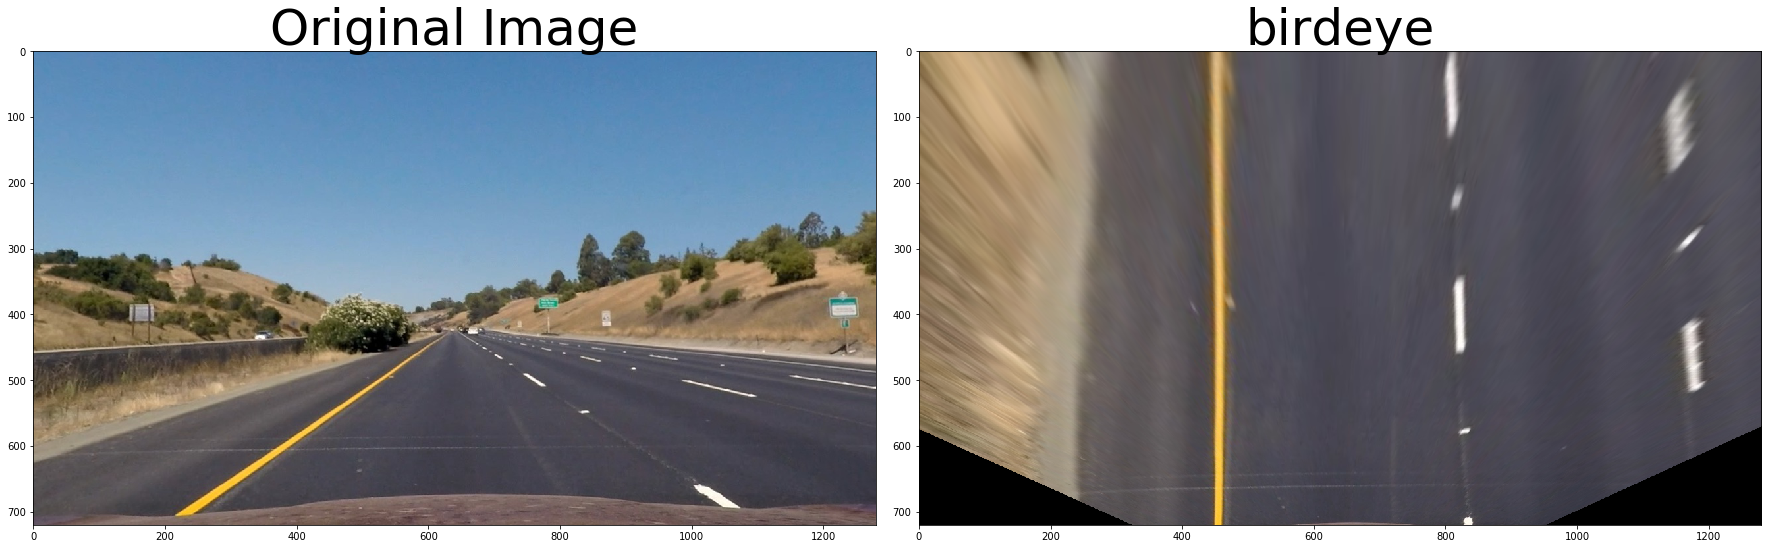

test


In [324]:
#test unwarp

# Choose an image from which to build and demonstrate each step of the pipeline
testimg = cv2.imread('output_images/undistorted_test/straight_lines1.jpg')
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)

testbirdeye,Minv,M = conv_birdeye(testimg)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(testimg)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(testbirdeye)
ax2.set_title('birdeye', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
print('test')

In [260]:
#convert undistorted images to birdeye
#load undistorted images
undistimages = glob.glob('output_images/undistorted_test/*.jpg')

#convert to birdeye and save

outdir = 'output_images/birdeye_test/'
# Visualize undistortion on test images

for i, fname in enumerate(undistimages):
    img = cv2.imread(fname)
    dst,Minv,M = conv_birdeye(img)
    filename = outdir + os.path.split(fname)[1] 
    cv2.imwrite(filename,dst)
    print(filename)



output_images/birdeye_test/straight_lines1.jpg
output_images/birdeye_test/straight_lines2.jpg
output_images/birdeye_test/test1.jpg
output_images/birdeye_test/test2.jpg
output_images/birdeye_test/test3.jpg
output_images/birdeye_test/test4.jpg
output_images/birdeye_test/test5.jpg
output_images/birdeye_test/test6.jpg


In [136]:
#get s channel an threshold

def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
 
    binary_output = np.zeros_like(l_channel)
    binary_output[(l_channel > thresh[0]) & (l_channel <= thresh[1])] = 1
    return binary_output

In [116]:
def sobel_hsv(img, s_thresh=(170, 255), sx_thresh=(40, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    
    flat_binary = np.zeros_like(sxbinary)
    flat_binary[(sxbinary == 1) | (s_binary == 1)] = 1
    
    return flat_binary

In [90]:
def roi_img(img,x1,x2):
    shape = img.shape
    vertices = np.array([[(x1,0),(x2,0),(x2,shape[0]), (x1,shape[0]), (x1,0)]],dtype=np.int32)
    
    roi_mask = np.zeros_like(img)
    
    # print(vertices)
    
    cv2.fillPoly(roi_mask, vertices, (255,))
    
    masked_image = cv2.bitwise_and(img, roi_mask)
    return masked_image
    

In [137]:
def lab_select(img, thresh=(0,255)):
    # 1) Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    lab_b = lab[:,:,2]
    
    if np.max(lab_b) > 175:
        lab_b = lab_b*(255/np.max(lab_b))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(lab_b)
    binary_output[((lab_b > thresh[0]) & (lab_b <= thresh[1]))] = 1
    # 3) Return a binary image of threshold result
    return binary_output

In [144]:
def lab_hls(img):
    img_lab = lab_select(img,(190,255))
    img_hls = hls_select(img,(220,255))
    
    # Combine 
    dst = np.zeros_like(img_lab)
    dst[(img_hls == 1) | (img_lab == 1)] = 1
    
    return dst

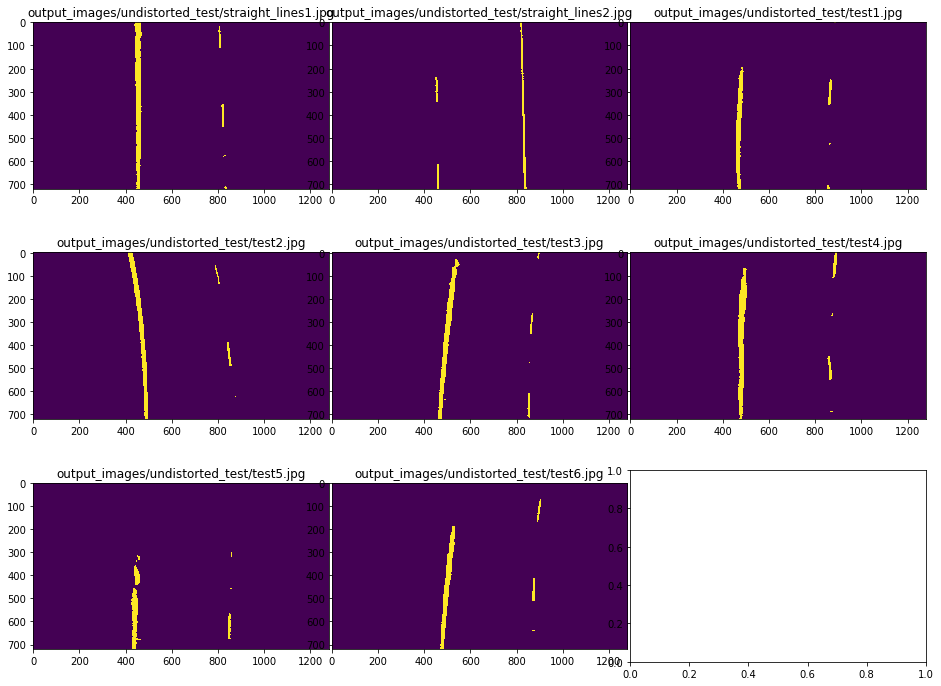

In [290]:
#test S channel selection on birdeye images

undistorted = glob.glob('output_images/undistorted_test/*.jpg')

fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.01)
axs = axs.ravel()

for i, fname in enumerate(undistorted):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    birdeyeimg,Minv,M = conv_birdeye(img)
    #hls_binary = sobel_hsv(img)
    hls_binary = lab_hls(birdeyeimg)
    
    masked_binary = roi_img(hls_binary,350,950)
    axs[i].imshow(masked_binary)
    axs[i].set_title(fname, fontsize=12)
    
plt.show()



In [309]:
def poly_fit(binary_warped):
    #Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit,right_fit
  

In [331]:
def skip_poly_fit(binary_warped,left_fit,right_fit,margin = 100):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit_ret = np.polyfit(lefty, leftx, 2)
    right_fit_ret = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fit_ret,right_fit_ret

In [167]:
def plot_lines(binary_warped,left_fit,right_fit,nonzerox,nonzeroy,plt):
        
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    plt.imshow(binary_warped)
    plt.plot(left_fitx, ploty, color='red')
    plt.plot(right_fitx, ploty, color='red')
    #plt.xlim(0, 1280)
    #plt.ylim(720, 0)

(720, 1280)
2668.38994891 17929.9833201
(720, 1280)
1422.10973325 27667.5305051
(720, 1280)
378.355063503 676.355827078
(720, 1280)
321.266831009 866.976303358
(720, 1280)
732.93994358 412.079968745
(720, 1280)
654.790140459 344.07916082
(720, 1280)
296.649794566 1756.14506239
(720, 1280)
643.014657996 423.82632397


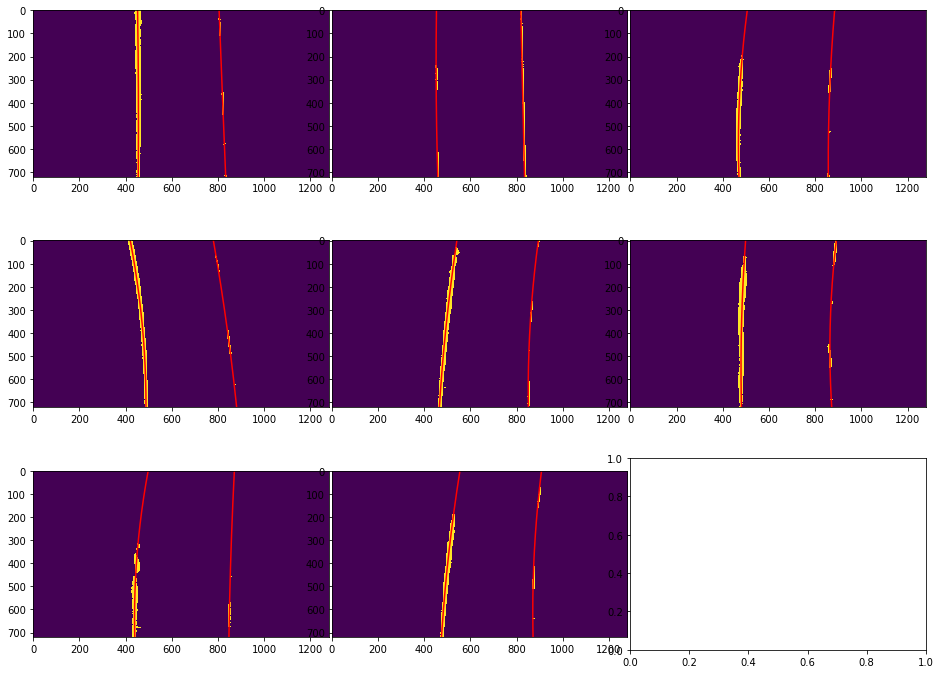

In [312]:
#test line fitting

undistorted = glob.glob('output_images/undistorted_test/*.jpg')

fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.01)
axs = axs.ravel()

for i, fname in enumerate(undistorted):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    birdeyeimg,Minv,M = conv_birdeye(img)
    
    hls_binary = lab_hls(birdeyeimg)
    masked_binary = roi_img(hls_binary,350,950)
    print(masked_binary.shape)
    
    left_fit,right_fit = poly_fit(masked_binary)
    plot_lines(masked_binary,left_fit,right_fit,nonzerox,nonzeroy,axs[i])
 
    #test other
    left_curve, right_curve = get_curvature(masked_binary,left_fit,right_fit)
    print(left_curve,right_curve)

 
    
    
plt.show()


In [300]:
def get_curvature(binary_warped,left_fit,right_fit):
    height = binary_warped.shape[0]
    ploty = np.linspace(0, height-1, height)
    y_eval = np.max(ploty)
    
    ym_per_pix = 3/100 # meters per pixel in y dimension
    xm_per_pix = 3.7/355 # meters per pixel in x dimension this number changes according to perspective transformation
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    return left_curverad, right_curverad
    

In [316]:
def get_distance(binary_warped,left_fit,right_fit):
    height = binary_warped.shape[0]

    xm_per_pix = 3.7/355 # meters per pixel in x dimension this number changes according to perspective transformation
        
    car_loc = binary_warped.shape[1]/2
    leftx = left_fit[0]*height**2 + left_fit[1]*height + left_fit[2]
    rightx = right_fit[0]*height**2 + right_fit[1]*height + right_fit[2]
    lane_center = (leftx + rightx) /2
    center_dist = (car_loc - lane_center) * xm_per_pix   
    
    return center_dist

In [241]:
def draw_lane_poly(original_img, binary_warped, left_fit, right_fit, Minv):
    
    height = binary_warped.shape[0]
    ploty = np.linspace(0, height-1, height)
    
    #draw lane polygons in the original image
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (original_img.shape[1], original_img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(original_img, 1, newwarp, 0.3, 0)
    
    return result

(720, 1280)
2668.38994891 17929.9833201
-0.043808703305
(720, 1280)
1422.10973325 27667.5305051
-0.0717822802997
(720, 1280)
378.355063503 676.355827078
-0.246400846848
(720, 1280)
321.266831009 866.976303358
-0.464610662641
(720, 1280)
732.93994358 412.079968745
-0.193831469148
(720, 1280)
654.790140459 344.07916082
-0.379471368801
(720, 1280)
296.649794566 1756.14506239
-0.0383765966492
(720, 1280)
643.014657996 423.82632397
-0.347334614329


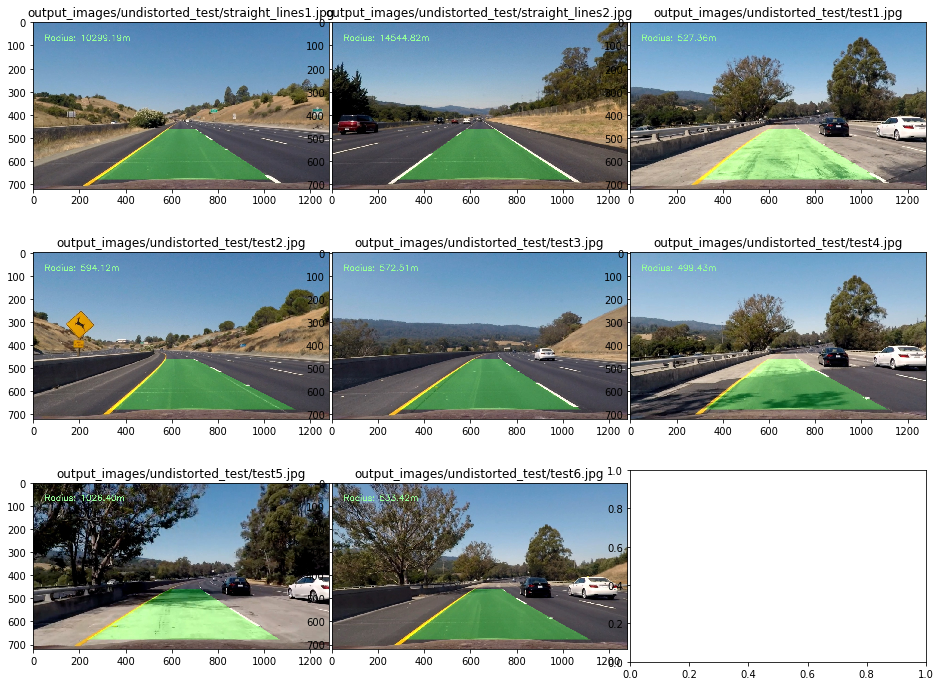

In [317]:
#test lane polygon drawing

undistorted = glob.glob('output_images/undistorted_test/*.jpg')

fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.01)
axs = axs.ravel()

for i, fname in enumerate(undistorted):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    birdeyeimg,Minv,M = conv_birdeye(img)
    
    hls_binary = lab_hls(birdeyeimg)
    masked_binary = roi_img(hls_binary,100,1070)
    print(masked_binary.shape)
    
    left_fit,right_fit = poly_fit(masked_binary)
    
    left_curve, right_curve = get_curvature(masked_binary,left_fit,right_fit)
    center_distance = get_distance(masked_binary,left_fit,right_fit)
        
    ret_img = draw_lane_poly(img, masked_binary, left_fit, right_fit, Minv)
    font = cv2.FONT_HERSHEY_SIMPLEX
    curve = ((left_curve+right_curve)/2)
    text = 'Radius: ' + '{:05.2f}'.format(curve) + 'm'
    cv2.putText(ret_img, text, (50,80), font, 1.2, (150,255,155), 2, cv2.LINE_AA)
    

    
    axs[i].imshow(ret_img)
    axs[i].set_title(fname, fontsize=12)
    
    print(left_curve,right_curve)
    print(center_distance)
    
    
plt.show()

In [322]:
def process_frame(img):
    process_img = np.copy(img)
    
    #process_img = cv2.cvtColor(process_img, cv2.COLOR_BGR2RGB)
    birdeyeimg,Minv,M = conv_birdeye(process_img)
    
    hls_binary = lab_hls(birdeyeimg)
    masked_binary = roi_img(hls_binary,200,1000)
    left_fit,right_fit = poly_fit(masked_binary)

    ret_img = draw_lane_poly(process_img, masked_binary, left_fit, right_fit, Minv)
    
    left_curve, right_curve = get_curvature(masked_binary,left_fit,right_fit)
    #write the curvature
    font = cv2.FONT_HERSHEY_SIMPLEX
    curve = ((left_curve+right_curve)/2)
    if (curve < 1500):
        text = 'Radius: ' + '{:05.2f}'.format(curve) + 'm'
    else:
        text = 'Radius : - '
    cv2.putText(ret_img, text, (50,80), font, 1.2, (150,255,155), 2, cv2.LINE_AA)
    
    center_distance = get_distance(masked_binary,left_fit,right_fit)
    
    if (center_distance < 0):
        center_distance = abs(center_distance)
        text ='Displacement : ' + '{:04.3f}'.format(center_distance) + 'm left'
    elif ( center_distance>0):
        center_distance = abs(center_distance)
        text ='Displacement : ' + '{:04.3f}'.format(center_distance) + 'm right'
    else:
        text ='Displacement : 0' 
        
    cv2.putText(ret_img, text, (50,180), font, 1.2, (150,255,155), 2, cv2.LINE_AA)

   
    return ret_img
  
    

In [323]:
from moviepy.editor import VideoFileClip

#process video image
input_file = 'project_video.mp4'
output_file = 'project_out_video.mp4'

test_video = VideoFileClip(input_file)

out_video = test_video.fl_image(process_frame)

out_video.write_videofile(output_file, audio=False)


[MoviePy] >>>> Building video project_out_video.mp4
[MoviePy] Writing video project_out_video.mp4


100%|█████████▉| 1260/1261 [02:23<00:00,  9.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_out_video.mp4 

